<a href="https://colab.research.google.com/github/valentinagliozzi/NNCourse/blob/main/hop_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
from scipy.io import loadmat

import pylab as pl
from IPython import display

# Helper functions

In [20]:

def hop_plotdig(P, r=None, c=None, stri=None, ax=None):
    """
    Displays the Hopfield digit stored in P.
    If P is a vector, it must first be reshaped.
    """
    if r is not None and c is not None:
        P = np.reshape(P, (r, c)).T

    P = (P + 1) * 64

    ax.imshow(P, cmap="bone")
    ax.set_xticks([])
    ax.set_yticks([])

    if stri is not None:
        ax.set_xlabel(stri)


def hop_plotpats(P):
    """
    Routine plots the digits for the Hopfield network, the patterns
    are contained in the file hop_data.mat
    """
    n1 = "zero"
    n2 = "one"
    n3 = "two"
    n4 = "three"
    n5 = "four"
    n6 = "six"
    n7 = "nine"
    n8 = "block"

    labels = [n1, n2, n3, n4, n5, n6, n7, n8]

    fig, ax = pl.subplots(3, 3)
    fig.set_size_inches(10, 10)
    for i in range(8):
        hop_plotdig(P[:, i], 10, 12, labels[i], ax[i // 3, i % 3])

    fig.show()


def hop_stor(P):
    """
    Performs the storage (learning phase) for a Hopfield network.

    Parameters:
    P - patterns to be stored (column wise matrix)

    Returns:
    W - weight matrix
    """
    n, p = P.shape
    W = np.zeros((n, n))
    for j in range(1, n):
        for i in range(j):
            W[i, j] = np.dot(P[i, :], P[j, :]) / p
            W[j, i] = W[i, j]
    return W


def hop_flip(P, prob):
    """
    This routine randomly flips bits in the input pattern (P) according to the
    user specified probability.

    Parameters:
    P - input pattern
    prob - probability of flipping a bit

    Returns:
    P - modified pattern
    flip - number of bits flipped
    """
    P = P.flatten()
    r = P.shape[0]
    flip = 0

    for i in range(r):
        v = np.random.rand()
        if v <= prob:
            flip += 1
            P[i] = P[i] * (-1)

    P = P.reshape(-1, 1)
    return P, flip


def hop_test(W, x, plot="on", fig=None, ax=None):
    """
    Parameters:
    W - weight matrix
    x - probe vector
    fig - figure handle
    ax - axis handle

    Returns:
    s - output state vector
    count - number of cycles until stable state is reached
    stable - if this is a stable state (for sure eventually it is)
    """
    s_prev = x.flatten()
    count = 0
    stable = False


    while  not stable:
        ch = []
        count += 1
        nv = np.sign(np.dot(W, s_prev))
        ch = [j for j in range(120) if nv[j] != 0 and abs(nv[j] - s_prev[j]) > 0]
        if not ch:
          stable = True
          break
        else:
          r_ind = np.random.choice(ch)
          s_prev[r_ind] = -s_prev[r_ind]

    s = s_prev.reshape(x.shape)
    return s,count,stable

# The Hopfield Network - Demo 1 - Pattern Recall

This algorithm demonstrates recall of a corrupted pattern.
The user is prompted for the input pattern and the noise level
as well as an interval at which to show progress of the algorithm.

Loading the digits.

--2025-10-27 10:53:13--  https://github.com/valentinagliozzi/NNCourse/raw/main/hop_data.mat
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/valentinagliozzi/NNCourse/main/hop_data.mat [following]
--2025-10-27 10:53:13--  https://raw.githubusercontent.com/valentinagliozzi/NNCourse/main/hop_data.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15578 (15K) [application/octet-stream]
Saving to: ‘hop_data.mat’

hop_data.mat        100%[===================>]  15.21K  --.-KB/s    in 0.001s  

2025-10-27 10:53:13 (11.0 MB/s) - ‘hop_data.mat’ saved [15578/15578]



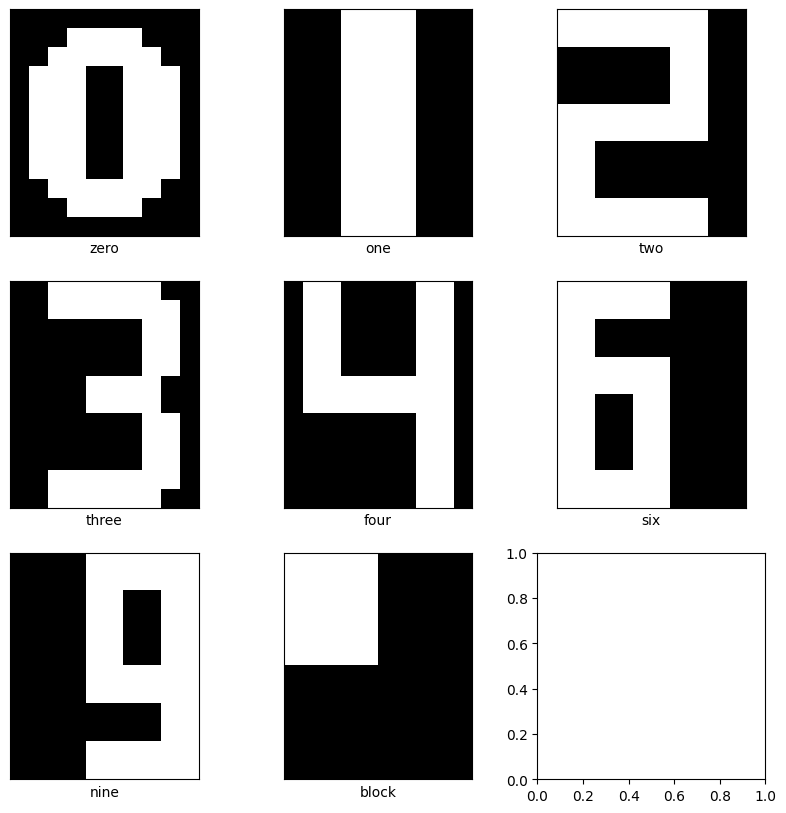

In [21]:
!wget "https://github.com/valentinagliozzi/NNCourse/raw/main/hop_data.mat" -O "hop_data.mat"
data = loadmat("hop_data.mat")
P = data["P"]
hop_plotpats(P)

In [22]:
# ----------------- Calculate Weight Matrix
W = hop_stor(P)

In [23]:
# User options

pat = 5  # pattern to test
pr = 0.2 # probability of flipping a bit (noise level)



In [24]:
# Corrupt the pattern with noise

test_pat, flip = hop_flip(P[:, pat - 1], pr)

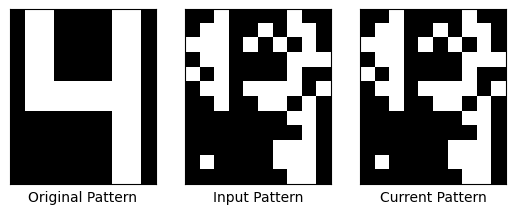

In [25]:
fig, ax = pl.subplots(1, 3)
hop_plotdig(P[:, pat - 1], 10, 12, "Original Pattern", ax=ax[0])
hop_plotdig(test_pat, 10, 12, "Input Pattern", ax=ax[1])
hop_plotdig(test_pat, 10, 12, "Current Pattern", ax=ax[2])

Number of updates for final state: 23


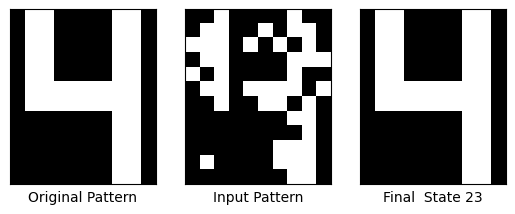

In [26]:
from os import set_inheritable
from time import sleep

# Execute the Hopfield network for u updates. Run again to perform additional updates

for i in range(100):
    test_pat,c,stable = hop_test(W, test_pat)
    if not stable:
     ax[2].clear()
     hop_plotdig(test_pat, 10, 12, f"Current State {(i+1)}", ax=ax[2])
     display.display(fig)
     display.clear_output(wait=True)
     sleep(0.5)
    else:
     ax[2].clear()
     hop_plotdig(test_pat, 10, 12, f"Final  State {(i)+c}", ax=ax[2])
     print(f"Number of updates for final state: {(i)+c}")
     display.display(fig)
     display.clear_output(wait=True)
     sleep(0.5)
     break
